In [1]:
#From the console, run the following
#pip install numpy
#pip install scipy
#pip install scikit-learn
#pip install matplotlib

# Import required packages here (after they are installed)
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as mp
from pylab import show

from sklearn.model_selection import cross_val_score, cross_val_predict


from statistics import mean, stdev, median, mode

In [2]:
# Load data. csv file should be in the same folder as the notebook for this to work, otherwise
# give data path.
data = np.loadtxt("data.csv")

In [3]:
#shuffle the data and select training and test data
np.random.seed(100)
np.random.shuffle(data)


features = []
digits = []


for row in data:
    #import the data and select only the 1's and 5's
    if(row[0]==1 or row[0]==5):
        features.append(row[1:])
        digits.append(str(row[0]))

        
#Select the proportion of data to use for training. 
#Notice that we have set aside 80% of the data for testing
numTrain = int(len(features)*.2)

trainFeatures = features[:numTrain]
testFeatures = features[numTrain:]
trainDigits = digits[:numTrain]
testDigits = digits[numTrain:]



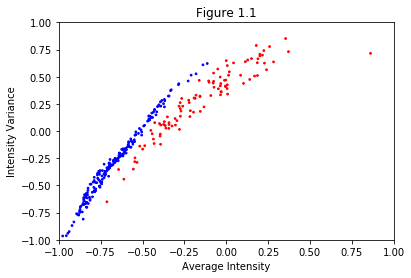

In [4]:
#Convert the 256D data (trainFeatures) to 2D data
#We need X and Y for plotting and simpleTrain for building the model.
#They contain the same points in a different arrangement

X = []
Y = []
simpleTrain = []

#Colors will be passed to the graphing library to color the points.
#1's are blue: "b" and 5's are red: "r"
colors = []
for index in range(len(trainFeatures)):
    #produce the 2D dataset for graphing/training and scale the data so it is in the [-1,1] square
    xNew = 2*np.average(trainFeatures[index])+.75 
    yNew = 3*np.var(trainFeatures[index])-1.5
    X.append(xNew)
    Y.append(yNew)
    simpleTrain.append([xNew,yNew])
    #trainDigits will still be the value we try to classify. Here it is the string "1.0" or "5.0"
    if(trainDigits[index]=="1.0"):
        colors.append("b")
    else:
        colors.append("r")

#plot the data points
### https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html
mp.scatter(X,Y,s=3,c=colors)

#specify the axes
mp.xlim(-1,1)
mp.xlabel("Average Intensity")
mp.ylim(-1,1)
mp.ylabel("Intensity Variance")
mp.title("Figure 1.1")
#display the current graph
show()

In [5]:
# create the model
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# With two dimensions
# Declare Model
model1 = KNeighborsClassifier(n_neighbors=1)
# Fit model to our data
model1.fit(simpleTrain,trainDigits)

# Lists to hold inpoints, predictions and assigned colors
xPred = []
yPred = []
cPred = []
# Use input points to get predictions here
for xP in range(-100,100):
    xP = xP/100.0
    for yP in range(-100,100):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        if(model1.predict([[xP,yP]])=="1.0"):
            cPred.append("b")
        else:
            cPred.append("r")

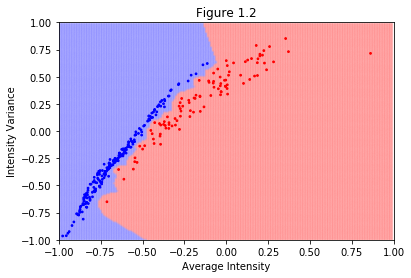

In [6]:
## Visualize Results
#plot the points
mp.scatter(X,Y,s=3,c=colors)

#plot the regions
mp.scatter(xPred,yPred,s=3,c=cPred,alpha=.1)

#setup the axes
mp.xlim(-1,1)
mp.xlabel("Average Intensity")
mp.ylim(-1,1)
mp.ylabel("Intensity Variance")
mp.title("Figure 1.2")
show()

In [7]:
# Q1A) Since K=1, this model overfits because of 100 percent accuracy in case of training data set

# Q1B) Since we are converting the 256 dimensional data to 2d data (aggregation), we could lose the variance in the input data. 
   # So, I am expecting the accuracy to decrease.

In [8]:
#Predicting test dataset using 2 dimensions
# Using Euclidean

model2  = KNeighborsClassifier(n_neighbors = 1, metric = 'euclidean')
#model2.predict(testFeatures)

ecv = 1- (cross_val_score(model2, simpleTrain, trainDigits, cv = 10, scoring='accuracy').mean())
# ecv = cross_val_predict(model2, simpleTrain, trainDigits, cv = 10)
ecv

0.006559139784946155

In [9]:
#Predicting test dataset using 2 dimensions
# Using manhattan

model2  = KNeighborsClassifier(n_neighbors = 1, metric = 'manhattan')
#model2.predict(testFeatures)


ecv = 1- (cross_val_score(model2, simpleTrain, trainDigits, cv = 10, scoring='accuracy').mean())
ecv

0.009892473118279455

In [10]:
#Predicting test dataset using 2 dimensions
# Using chebyshev

model2  = KNeighborsClassifier(n_neighbors = 1, metric = 'chebyshev')
#model2.predict(testFeatures)


ecv = 1-(cross_val_score(model2, simpleTrain, trainDigits, cv = 10, scoring='accuracy').mean())
ecv

0.009784946236559122

In [11]:
#Predicting test dataset using 256 dimensions
# Using Euclidean

model256  = KNeighborsClassifier(n_neighbors = 1, metric = 'euclidean')
#model2.predict(testFeatures)


ecv = 1- (cross_val_score(model256, trainFeatures, trainDigits, cv = 10, scoring='accuracy').mean())
ecv

0.0033333333333332993

In [12]:
#Predicting test dataset using 256 dimensions
# Using manhattan

model256  = KNeighborsClassifier(n_neighbors = 1, metric = 'manhattan')
#model2.predict(testFeatures)


ecv = 1-(cross_val_score(model256, trainFeatures, trainDigits, cv = 10, scoring='accuracy').mean())
ecv

0.006559139784946155

In [13]:
#Predicting test dataset using 256 dimensions
# Using chebyshev

model256  = KNeighborsClassifier(n_neighbors = 1, metric = 'chebyshev')
#model2.predict(testFeatures)


ecv = 1-(cross_val_score(model256, trainFeatures, trainDigits, cv = 10, scoring='accuracy').mean())
ecv

0.09932123655913971

In [14]:
#Q1c) I got less errors with euclidean distance regardless of no of dimensions i.e 256d or 2d. And the error obtained from 256 dimensional data 
 # is lesser compared to 2d data for both euclidean and manhattan, but the error increased a lot in case of chebychev for 256 dimensional data.
 # These differences can be attributed to the definitions of the various distance metrics. Since euclidean distance is a better measure for 
 # actual distance than the rest, I got less error. 
 # And since chebyshev distance gets affected by the number of dimensions, the error got increased with 256 dimensional data. 

Text(0.5, 1.0, 'Figure 1.3')

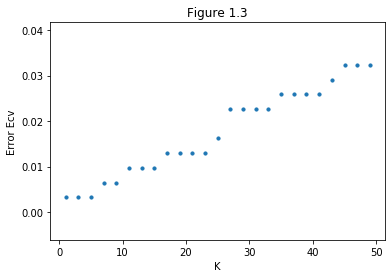

In [15]:
# USING 256 dimensional data
x = []
y = []
z = []
p =[]
for i in range(1,50):
    if i%2 != 0:
        #print(i)
        model2  = KNeighborsClassifier(n_neighbors = i, metric = 'euclidean')
        #model2.predict(testFeatures)
        cvs = cross_val_score(model2, trainFeatures, trainDigits, cv = 10, scoring='accuracy')
        err = 1-cvs
        evsm = 1-(cvs.mean())
        p.append(err)
        x.append(i)
        y.append(evsm)
        z.append([x,evsm])
        
# print(len(x))
# print(len(y))
# print(count)   
mp.scatter(x,y, s=10)
mp.xlabel("K")
mp.ylabel("Error Ecv")
mp.title("Figure 1.3")

In [16]:
#Q2A) I think the values {1,3,5} for k would yield the best result as I got least cross validation error (Ecv) for those values. 

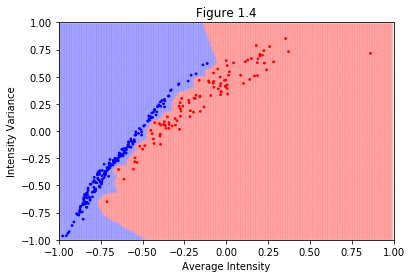

In [17]:
# Decision Boundary for 2 dimesional data in case of k=1
modelb = KNeighborsClassifier(n_neighbors=1)
# Fit model to our data
modelb.fit(simpleTrain,trainDigits)



# Lists to hold inpoints, predictions and assigned colors
xPred = []
yPred = []
cPred = []
# Use input points to get predictions here
for xP in range(-100,100):
    xP = xP/100.0
    for yP in range(-100,100):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        if(modelb.predict([[xP,yP]])=="1.0"):
            cPred.append("b")
        else:
            cPred.append("r")

## Visualize Results
#plot the points
mp.scatter(X,Y,s=3,c=colors)

#plot the regions
mp.scatter(xPred,yPred,s=3,c=cPred,alpha=.1)

#setup the axes
mp.xlim(-1,1)
mp.xlabel("Average Intensity")
mp.ylim(-1,1)
mp.ylabel("Intensity Variance")
mp.title("Figure 1.4")
show()

In [18]:
# Q2B) The model with K=1 is more likely to overfit the 2 dimensional data as we got 100 percent accuracy for training set

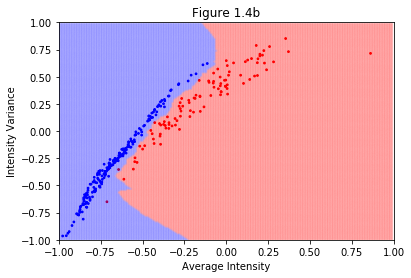

In [19]:
# Decision Boundary for 2 dimesional data in case of k=3
modelb = KNeighborsClassifier(n_neighbors=3)
# Fit model to our data
modelb.fit(simpleTrain,trainDigits)



# Lists to hold inpoints, predictions and assigned colors
xPred = []
yPred = []
cPred = []
# Use input points to get predictions here
for xP in range(-100,100):
    xP = xP/100.0
    for yP in range(-100,100):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        if(modelb.predict([[xP,yP]])=="1.0"):
            cPred.append("b")
        else:
            cPred.append("r")

## Visualize Results
#plot the points
mp.scatter(X,Y,s=3,c=colors)

#plot the regions
mp.scatter(xPred,yPred,s=3,c=cPred,alpha=.1)

#setup the axes
mp.xlim(-1,1)
mp.xlabel("Average Intensity")
mp.ylim(-1,1)
mp.ylabel("Intensity Variance")
mp.title("Figure 1.4b")
show()

In [20]:
# Q2B)The model with K=3 is not that easily prone to overfitting as some obserations of training set were misclassified

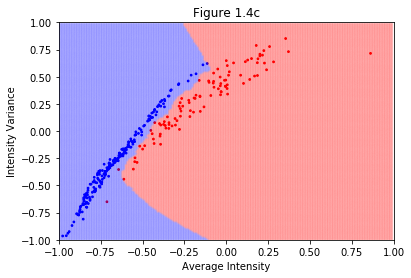

In [21]:
# Decision Boundary for 2 dimesional data in case of k=5
modelb = KNeighborsClassifier(n_neighbors=5)
# Fit model to our data
modelb.fit(simpleTrain,trainDigits)



# Lists to hold inpoints, predictions and assigned colors
xPred = []
yPred = []
cPred = []
# Use input points to get predictions here
for xP in range(-100,100):
    xP = xP/100.0
    for yP in range(-100,100):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        if(modelb.predict([[xP,yP]])=="1.0"):
            cPred.append("b")
        else:
            cPred.append("r")

## Visualize Results
#plot the points
mp.scatter(X,Y,s=3,c=colors)

#plot the regions
mp.scatter(xPred,yPred,s=3,c=cPred,alpha=.1)

#setup the axes
mp.xlim(-1,1)
mp.xlabel("Average Intensity")
mp.ylim(-1,1)
mp.ylabel("Intensity Variance")
mp.title("Figure 1.4c")
show()

In [22]:
# Q2B)The model with K=5 is not that easily prone to overfitting as some obserations of training set were misclassified

In [23]:
#mp.hist(y)

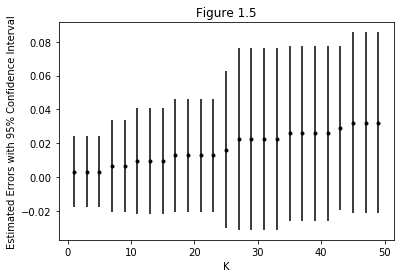

In [24]:

m=[]
std =[]
#print(y)
for i in range(0,25):
    m.append(mean(p[i]))
    std.append(2*stdev(p[i]))
    

mp.errorbar(x, m, yerr=std, fmt='.k');

mp.xlabel("K")

mp.ylabel("Estimated Errors with 95% Confidence Interval")
mp.title("Figure 1.5")
show()

In [25]:
# Q2C) There are three models with lowest 95% upper bound. Out of these, the model with k=1 is more likely to overfit 
# as the accuracy of training set is 100%

In [26]:
# Extra Credit

# I got the US senate elections 2018 dataset for which the optimal K value was found to be 4
 # Dataset is in my github link: https://github.com/kalyankumarp/US-Senate-Elections-2018-Part-1/tree/master/Project%201

# For high optimal K value, I obtained the mushrooms dataset from UCI machine learning repository. The optimal K value is 53 
 # (obtained using Bayesian Optimization)
 # Dataset link: https://archive.ics.uci.edu/ml/datasets/Mushroom
 # for bayesian optimization, 
 # check my github link: https://github.com/kalyankumarp/CS412-Introduction-to-Machine-Learning/blob/master/Homeworks/HW1/K1.ipynb

In [27]:
# #Convert the 256D TEST data (testFeatures) to 2D data
# #We need X and Y for plotting and simpleTest for evaluating the model.
# #They contain the same points in a different arrangement

# #print(len(trainFeatures))
# Xtest = []
# Ytest = []
# simpleTest = []

# #Colors will be passed to the graphing library to color the points.
# #1's are blue: "b" and 5's are red: "r"
# colorstest = []
# for index in range(len(testFeatures)):
#     #produce the 2D dataset for graphing/training and scale the data so it is in the [-1,1] square
#     xNewtest = 2*np.average(testFeatures[index])+.75 
#     yNewtest = 3*np.var(testFeatures[index])-1.5
#     Xtest.append(xNewtest)
#     Ytest.append(yNewtest)
#     simpleTest.append([xNewtest,yNewtest])
#     #trainDigits will still be the value we try to classify. Here it is the string "1.0" or "5.0"
#     if(testDigits[index]=="1.0"):
#         colorstest.append("b")
#     else:
#         colorstest.append("r")

# # #plot the data points
# # ### https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html
# # mp.scatter(Xtest,Ytest,s=3,c=colorstest)

# # #specify the axes
# # mp.xlim(-1,1)
# # mp.xlabel("Average Intensity")
# # mp.ylim(-1,1)
# # mp.ylabel("Intensity Variance")

# # #display the current graph
# # show()

In [28]:
# # Checking with test data for overfitting

# #Predicting test dataset using 2 dimensions
# # Using Euclidean

# model2  = KNeighborsClassifier(n_neighbors = 1, metric = 'euclidean')
# #model2.predict(testFeatures)

# ecv = 1- (cross_val_score(model2, simpleTest, testDigits, cv = 10, scoring='accuracy').mean())
# ecv